In [ ]:
from google.colab import drive
drive.mount('mydrive')

Mounted at mydrive


In [ ]:
from zipfile import ZipFile
file_name = "/content/mydrive/MyDrive/My Files/Datasets/Facial_Emotion/archive.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator

In [ ]:
os.listdir("train/")

['sad', 'happy', 'disgust', 'surprise', 'fear', 'neutral', 'angry']

In [ ]:
train_dir = "train/"
val_dir = "test/"
num_classes = 7

BATCH_SIZE = 32
IMG_SIZE = 48

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255,
)

In [ ]:
train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode="sparse",
)

test_gen = datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode="sparse",
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
len(train_gen)

898

In [ ]:
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

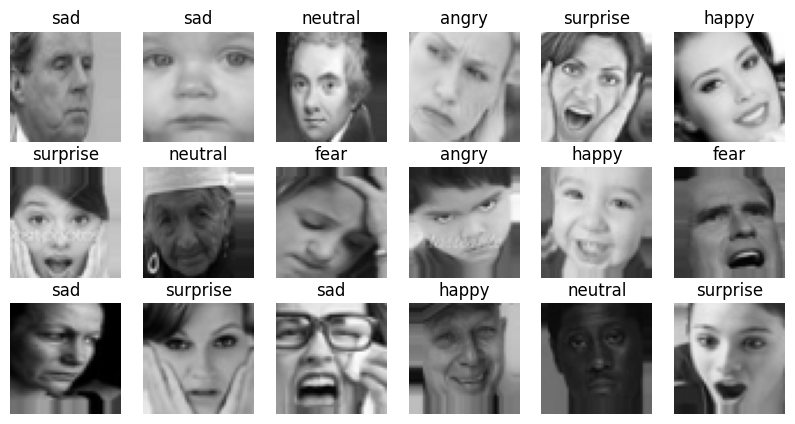

In [ ]:
batch = train_gen.next()

plt.figure(figsize=(10, 5))
for i in range(18):
  plt.subplot(3, 6, i+1)
  plt.imshow(batch[0][i])
  plt.title(class_names[int(batch[1][i])])
  plt.axis("off")

In [ ]:
def my_model():
  img_inputs = tf.keras.Input(shape=(48, 48, 3))

  # CNN Layers
  x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(img_inputs)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.MaxPooling2D(2)(x)
  x = tf.keras.layers.Dropout(0.3)(x)

  x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.MaxPooling2D(2)(x)
  x = tf.keras.layers.Dropout(0.3)(x)

  x = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.MaxPooling2D(2)(x)
  x = tf.keras.layers.Dropout(0.3)(x)

  x = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.MaxPooling2D(2)(x)
  x = tf.keras.layers.Dropout(0.3)(x)

  # Dense Layers
  x = tf.keras.layers.Flatten()(x)

  x = tf.keras.layers.Dense(512, activation="relu")(x)
  x = tf.keras.layers.Dropout(0.5)(x)
  
  output = tf.keras.layers.Dense(7, activation='softmax')(x)

  model = tf.keras.Model(inputs=img_inputs, outputs=output, name='Face_Emotion_Model')

  return model

In [ ]:
model = my_model()
model.summary()

Model: "Face_Emotion_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization_4 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_5 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 64)

In [ ]:
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics = ['accuracy'],
)

In [ ]:
model.fit(train_gen, epochs=50, batch_size=BATCH_SIZE, validation_data=test_gen, callbacks=[early])

Epoch 1/50
898/898 [==============================] - 97s 86ms/step - loss: 1.9650 - accuracy: 0.2195 - val_loss: 1.8706 - val_accuracy: 0.2467
Epoch 2/50
898/898 [==============================] - 67s 74ms/step - loss: 1.8024 - accuracy: 0.2534 - val_loss: 1.7844 - val_accuracy: 0.2591
Epoch 3/50
898/898 [==============================] - 65s 73ms/step - loss: 1.7519 - accuracy: 0.2855 - val_loss: 1.7133 - val_accuracy: 0.3169
Epoch 4/50
898/898 [==============================] - 66s 73ms/step - loss: 1.6750 - accuracy: 0.3278 - val_loss: 1.6211 - val_accuracy: 0.3587
Epoch 5/50
898/898 [==============================] - 66s 73ms/step - loss: 1.6015 - accuracy: 0.3685 - val_loss: 1.5068 - val_accuracy: 0.4001
Epoch 6/50
898/898 [==============================] - 65s 72ms/step - loss: 1.5202 - accuracy: 0.4105 - val_loss: 1.4227 - val_accuracy: 0.4437
Epoch 7/50
898/898 [==============================] - 66s 74ms/step - loss: 1.4379 - accuracy: 0.4470 - val_loss: 1.3252 - val_accuracy:

1/1 [==============================] - 0s 28ms/step


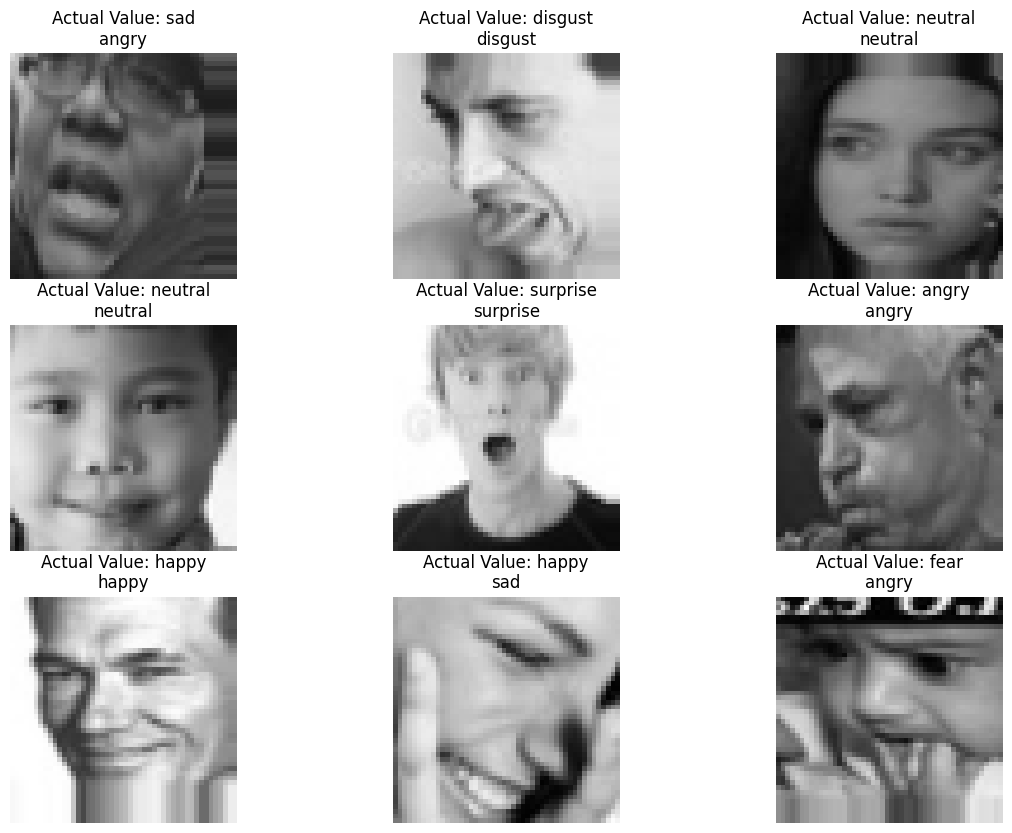

In [ ]:
batch = test_gen.next()

plt.figure(figsize=(14, 10))
batch_pred = model.predict(batch[0])
batch_pred = list(np.argmax(batch_pred, axis=1))

for i in range(9):
  plt.subplot(3, 3, i+1)
  
  plt.imshow(batch[0][i])
  plt.title("Actual Value: "+class_names[int(batch[1][i])]+"\n"+class_names[batch_pred[i]])
  plt.axis("off")

In [ ]:
base_model = tf.keras.applications.VGG16(
    input_shape=(48, 48, 3),
    include_top=False,
    weights='imagenet'
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
def my_new_model():
  img_inputs = tf.keras.Input(shape=(48, 48, 3))

  # base model
  x = base_model(img_inputs, training=False)
  x = tf.keras.layers.GlobalAveragePooling2D()(x)

  # Dense layers
  x = tf.keras.layers.Dense(1024, activation="relu", kernel_regularizer=tf.keras.regularizers.l1_l2(0.0001))(x)
  x = tf.keras.layers.Dropout(0.4)(x)
  
  x = tf.keras.layers.Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.l1_l2(0.0001))(x)
  x = tf.keras.layers.Dropout(0.4)(x)

  output = tf.keras.layers.Dense(7, activation='softmax')(x)

  model = tf.keras.Model(inputs=img_inputs, outputs=output, name='Face_Emotion_Model_With_VGG')

  return model

In [ ]:
model1 = my_new_model()
model1.summary()

Model: "Face_Emotion_Model_With_VGG"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dropout_7 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                       

In [ ]:
model1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics = ['accuracy'],
)

In [ ]:
model1.fit(train_gen, epochs=50, batch_size=BATCH_SIZE, validation_data=test_gen, callbacks=[early])

Epoch 1/50
898/898 [==============================] - 68s 68ms/step - loss: 7.1241 - accuracy: 0.3338 - val_loss: 2.6226 - val_accuracy: 0.4717
Epoch 2/50
898/898 [==============================] - 66s 74ms/step - loss: 2.0304 - accuracy: 0.4952 - val_loss: 1.6175 - val_accuracy: 0.5389
Epoch 3/50
898/898 [==============================] - 64s 71ms/step - loss: 1.4724 - accuracy: 0.5507 - val_loss: 1.3414 - val_accuracy: 0.5580
Epoch 4/50
898/898 [==============================] - 61s 67ms/step - loss: 1.2731 - accuracy: 0.5824 - val_loss: 1.2284 - val_accuracy: 0.5805
Epoch 5/50
898/898 [==============================] - 61s 68ms/step - loss: 1.1679 - accuracy: 0.6043 - val_loss: 1.1554 - val_accuracy: 0.5957
Epoch 6/50
898/898 [==============================] - 62s 69ms/step - loss: 1.1066 - accuracy: 0.6205 - val_loss: 1.1509 - val_accuracy: 0.5982
Epoch 7/50
898/898 [==============================] - 60s 67ms/step - loss: 1.0586 - accuracy: 0.6377 - val_loss: 1.0931 - val_accuracy:

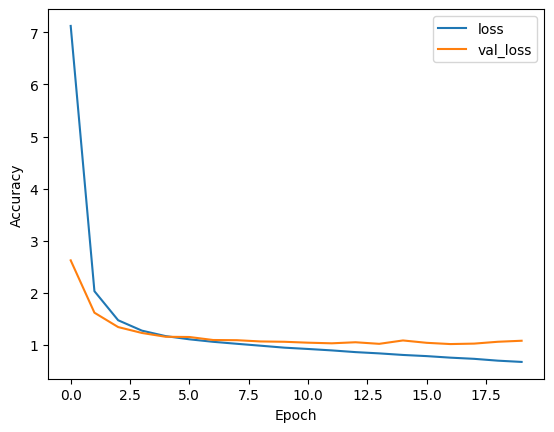

In [ ]:
plt.plot(model1.history.history['loss'], label='loss')
plt.plot(model1.history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 144ms/step


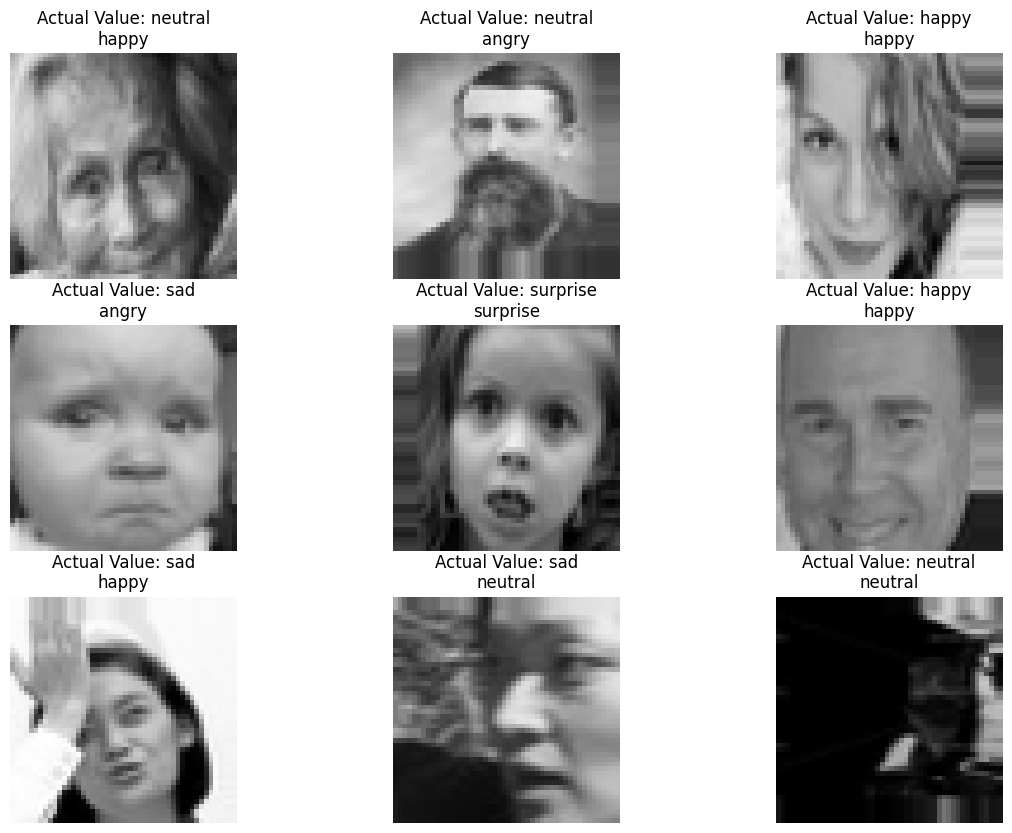

In [ ]:
batch = test_gen.next()

plt.figure(figsize=(14, 10))
batch_pred = model1.predict(batch[0])
batch_pred = list(np.argmax(batch_pred, axis=1))

for i in range(9):
  plt.subplot(3, 3, i+1)
  
  plt.imshow(batch[0][i])
  plt.title("Actual Value: "+class_names[int(batch[1][i])]+"\n"+class_names[batch_pred[i]])
  plt.axis("off")

In [ ]:
model1.save('/content/mydrive/MyDrive/My Files/Datasets/Facial_Emotion/emotion_recognizer.h5')